In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def plot_product_mid_prices(csv_file_path: str, ignore_old: bool = True):
    try:
        df = pd.read_csv(csv_file_path, delimiter=';')

        # Convert relevant cols to numeric
        df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')
        df['mid_price'] = pd.to_numeric(df['mid_price'], errors='coerce')

        # Drop rows where data is missing after conversion, if any
        df.dropna(subset=['timestamp', 'mid_price', 'product'], inplace=True)

        # Get all unique product
        all_products = df['product'].unique()

        # Products to ignore
        products_to_ignore = {"KELP", "RAINFOREST_RESIN", "SQUID_INK"} 

        # Filter the product list based on the ignore_old flag
        if ignore_old:
            products_to_plot = [p for p in all_products if p not in products_to_ignore]
        else:
            products_to_plot = list(all_products) # Plot all products

        num_products_to_plot = len(products_to_plot)

        # Check if there are any products left to plot
        if num_products_to_plot == 0:
            print("No products to plot")
            return

        # Create the figure and the exact number of subplots required
        fig, axes = plt.subplots(nrows=num_products_to_plot, ncols=1, sharex=True,
                                 figsize=(12, 4 * num_products_to_plot), squeeze=False)
        axes = axes.flatten()

        # Iterate through products 
        for i, product in enumerate(products_to_plot):
            ax = axes[i] # Select the correct subplot axis

            # Filter the DataFrame for the current product's data
            product_df = df[df['product'] == product].sort_values('timestamp')

            # Plot mid_price vs timestamp for this product
            ax.plot(product_df['timestamp'], product_df['mid_price'], label=product)

            # Set the title and y-axis label for this subplot
            ax.set_title(f'{product} Mid Price')
            ax.set_ylabel('Mid Price')
            ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
            ax.grid(True, linestyle='--', alpha=0.6)
            
             
        # Set the x-axis label only on the bottom-most subplot
        axes[-1].set_xlabel('Timestamp')
        plt.tight_layout() 
        plt.show()

    except FileNotFoundError:
        print(f"Error: The file '{csv_file_path}' was not found.")


### 2024 Data From Round 3 - Day 0

Round 3 includes baskets, like for us now in round 2

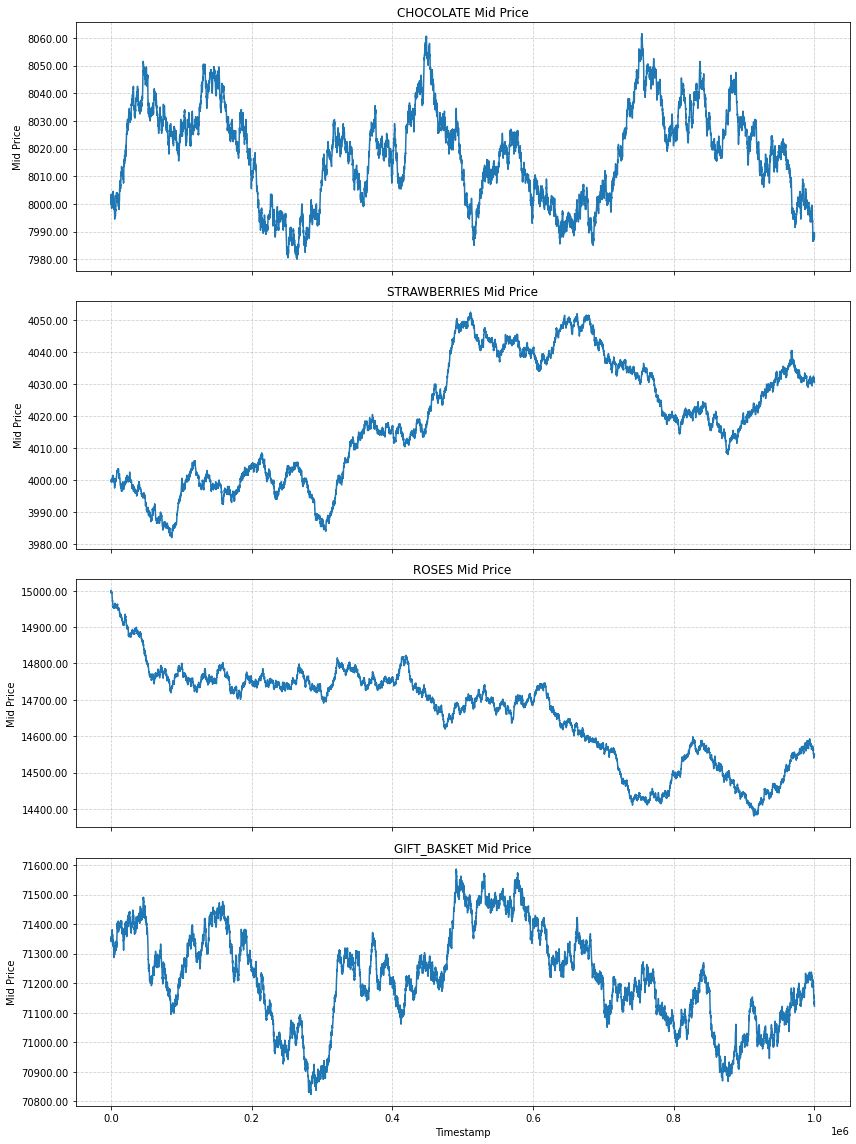

In [22]:
plot_product_mid_prices('data/2024/round-3/prices_round_3_day_0.csv')

### 2024 Data From Round 3 - Day -1

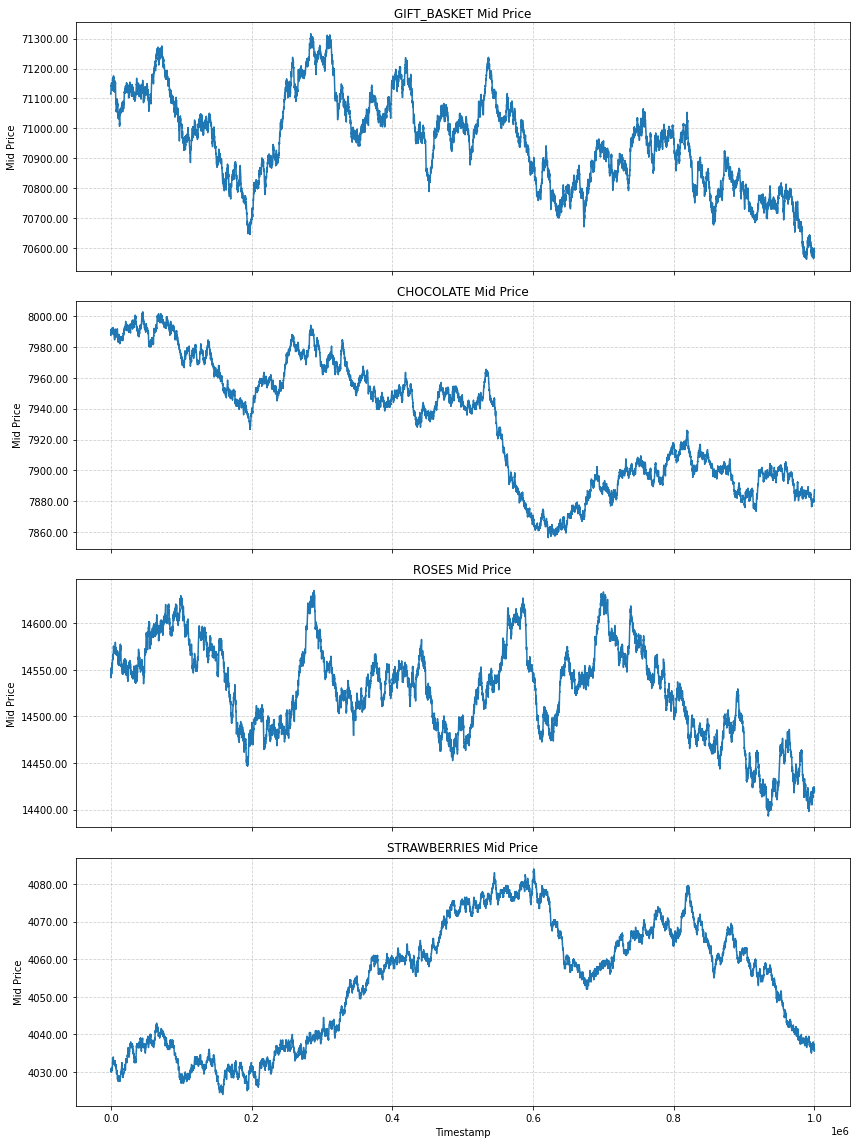

In [23]:
plot_product_mid_prices('data/2024/round-3/prices_round_3_day_1.csv')

### 2024 Data From Round 3 - Day -2

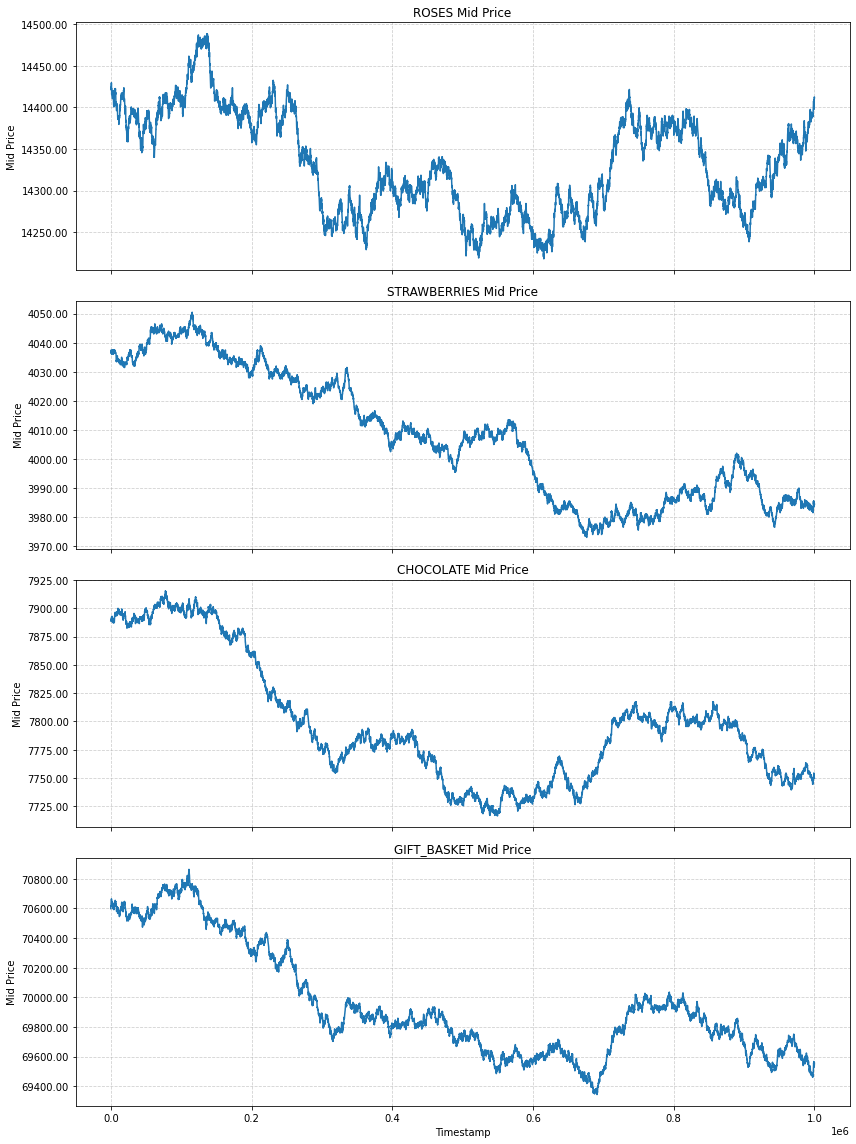

In [24]:
plot_product_mid_prices('data/2024/round-3/prices_round_3_day_2.csv')

### 2025 Data From Round 2 - Day 0

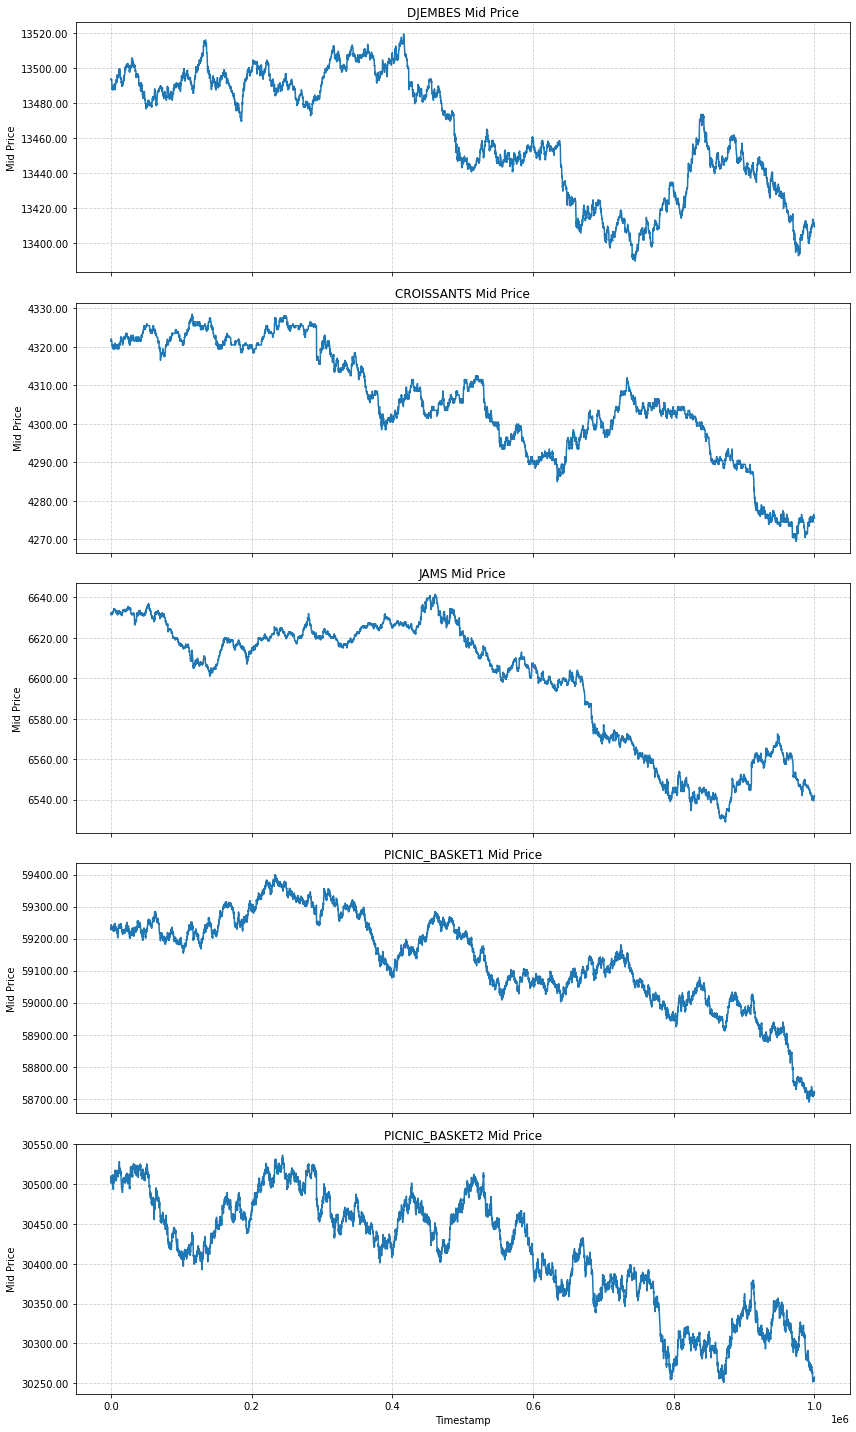

In [25]:
plot_product_mid_prices('data/2025/round2/prices_round_2_day_0.csv')

### 2025 Data From Round 2 - Day -1 (negative one)

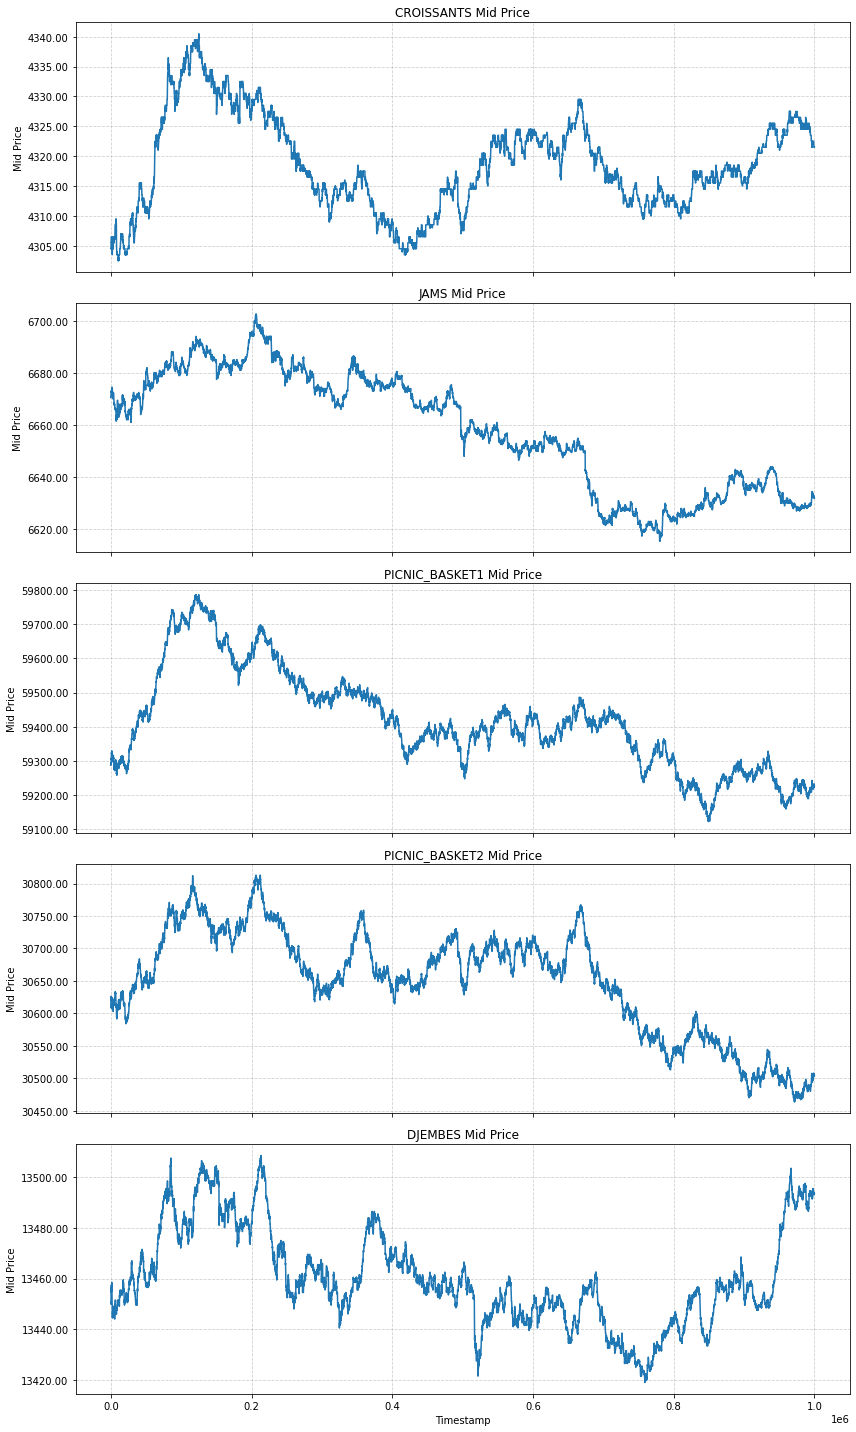

In [26]:
plot_product_mid_prices('data/2025/round2/prices_round_2_day_-1.csv')

### 2025 Data From Round 2 - Day 1 (positive one)

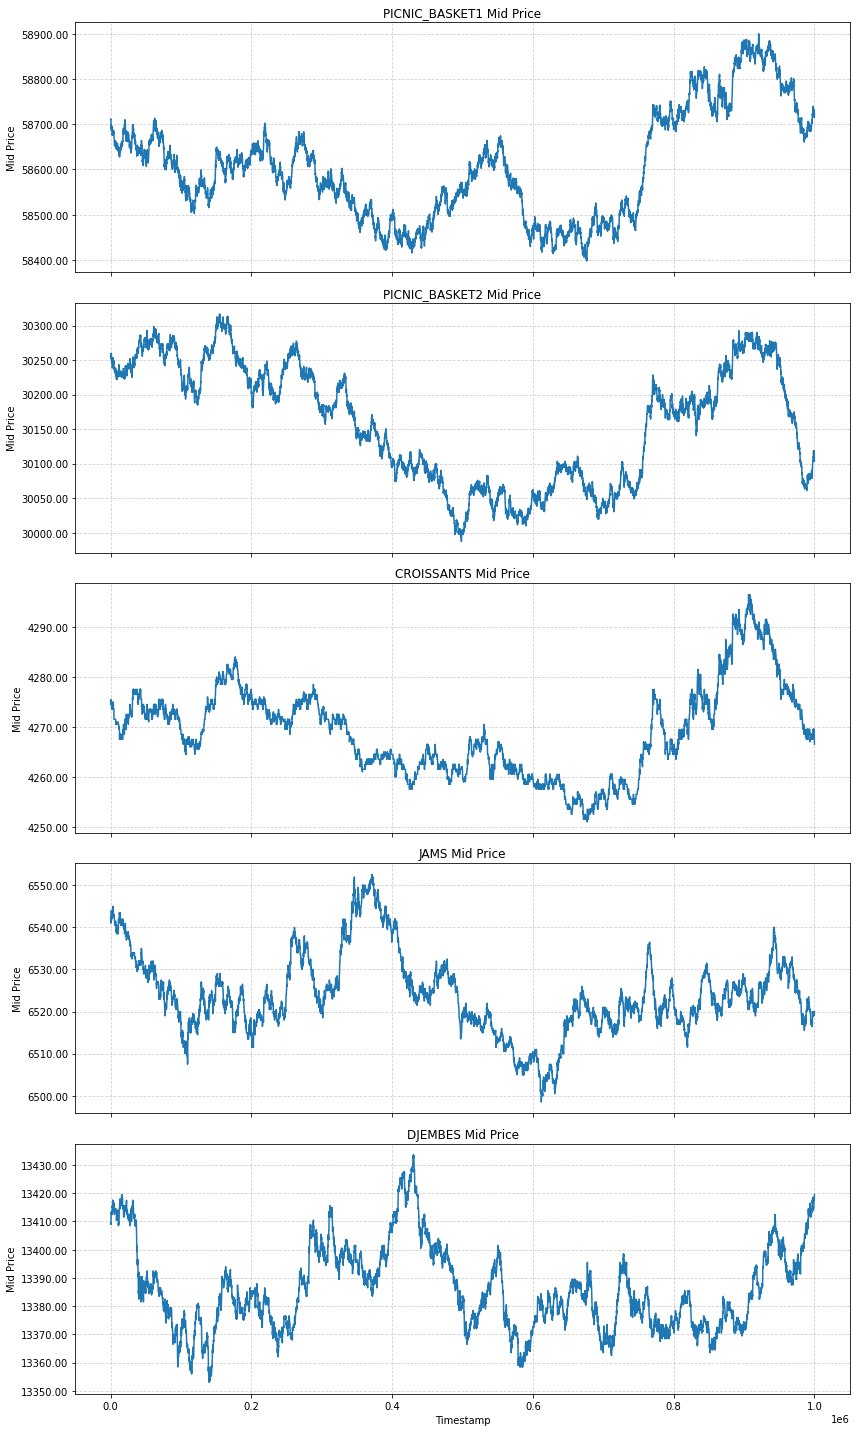

In [28]:
plot_product_mid_prices('data/2025/round2/prices_round_2_day_1.csv')

### Analysis of baskets and components
Extra CSV file created with synthetic prices of the baskets.

Note the constant gap between the midprice and synthetic value of basket2!

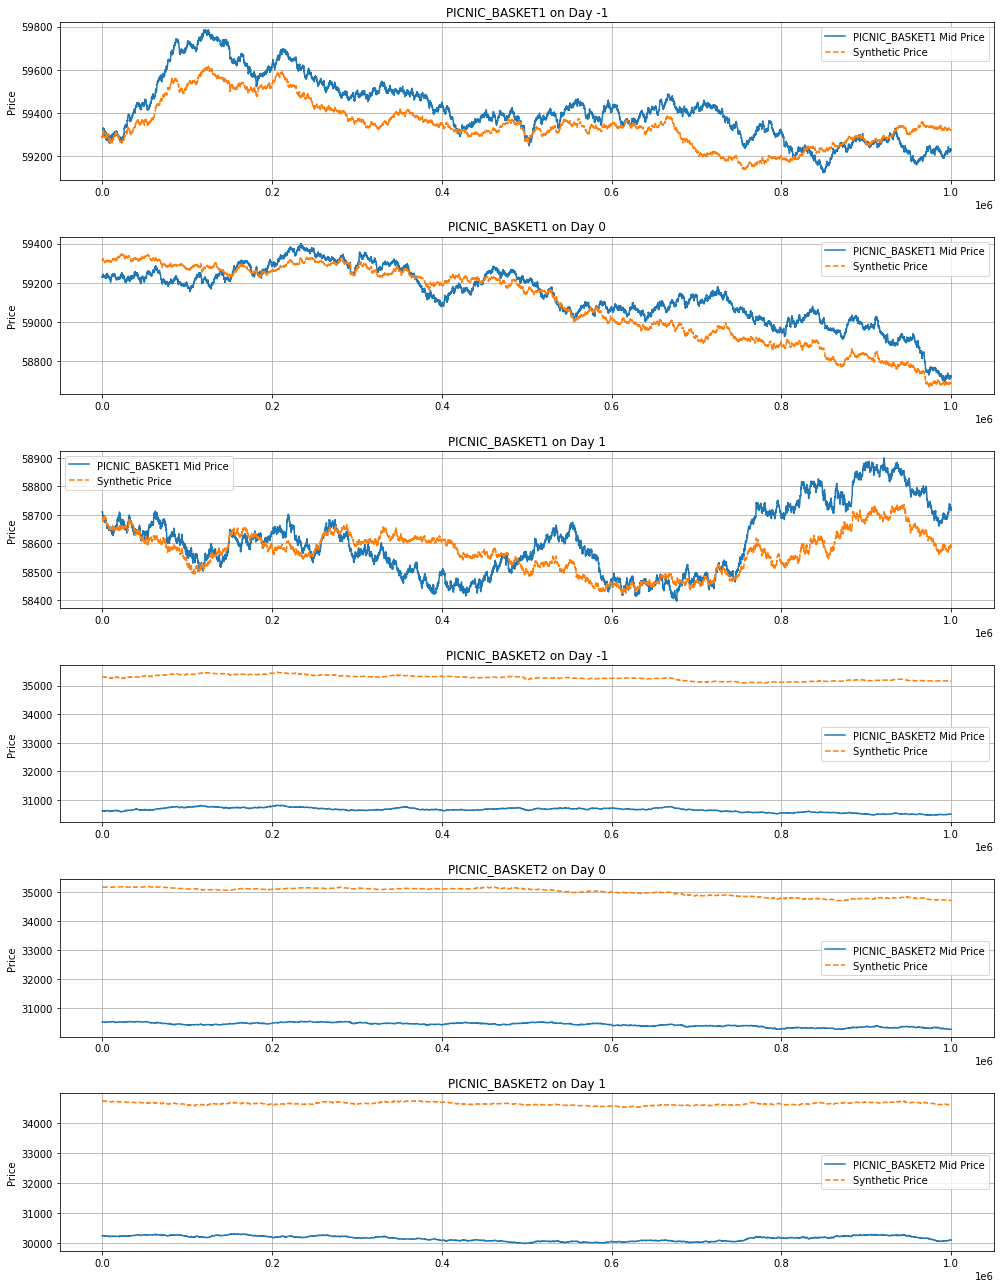

In [39]:
# Load data
CSV_PATH = "data/2025/round2/round2_alldays_with_synthetic.csv"
df = pd.read_csv(CSV_PATH, sep=";")
df = df.sort_values(by=["product", "day", "timestamp"])

# Basket filtering
basket_products = ["PICNIC_BASKET1", "PICNIC_BASKET2"]
days = [-1, 0, 1]

# Create 6 subplots (2 baskets × 3 days)
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(14, 18), sharex=False)

# Flatten axes for easier indexing
axes = axes.flatten()

plot_idx = 0
for product in basket_products:
    for day in days:
        basket_df = df[(df["product"] == product) & (df["day"] == day)]

        ax = axes[plot_idx]
        ax.plot(basket_df["timestamp"], basket_df["mid_price"], label=f"{product} Mid Price")
        ax.plot(basket_df["timestamp"], basket_df["synthetic_price"], label="Synthetic Price", linestyle="--")

        ax.set_title(f"{product} on Day {day}")
        ax.set_ylabel("Price")
        ax.legend()
        ax.grid(True)
        plot_idx += 1

plt.tight_layout()
plt.show()

**Based on the above graphs, it seems like the mid-price and synthetic price of BASKET2 are candidates for cointegration**  
See: https://hudsonthames.org/an-introduction-to-cointegration/  

### Next we will visualize the spreads

In [53]:
CSV_PATH = "data/2025/round2/round2_alldays_with_synthetic.csv"
df = pd.read_csv(CSV_PATH, sep=";")

# Calculate bid-ask spread
df["spread"] = df["ask_price_1"] - df["bid_price_1"]

# Only compute mid-synthetic spread for baskets
basket_products = ["PICNIC_BASKET1", "PICNIC_BASKET2"]
df["spread_mid_syn"] = np.where(
    df["product"].isin(basket_products),
    df["mid_price"] - df["synthetic_price"],
    0
)

df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,synthetic_price,spread,spread_mid_syn
0,-1,0,CROISSANTS,4304,112,NaN,NaN,NaN,NaN,4305,112,NaN,NaN,NaN,NaN,4304.5,0.0,0.0,1,0.0
1,-1,0,JAMS,6670,66,6669.0,137.0,NaN,NaN,6671,66,6672.0,137.0,NaN,NaN,6670.5,0.0,0.0,1,0.0
2,-1,0,SQUID_INK,2005,1,2002.0,31.0,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2005.5,0.0,0.0,1,0.0
3,-1,0,PICNIC_BASKET1,59284,20,59283.0,18.0,NaN,NaN,59294,2,59295.0,36.0,NaN,NaN,59289.0,0.0,59289.0,10,0.0
4,-1,0,PICNIC_BASKET2,30606,20,30605.0,18.0,NaN,NaN,30612,20,30613.0,18.0,NaN,NaN,30609.0,0.0,35291.0,6,-4682.0


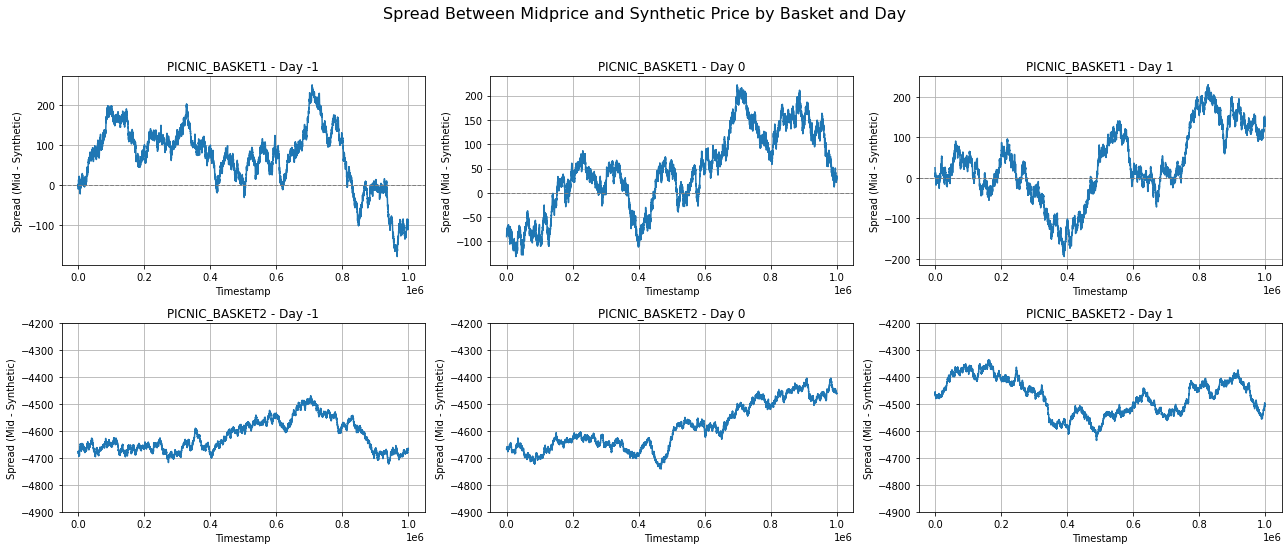

In [45]:
# Set up the figure with 6 subplots (2 rows: 1 per basket, 3 columns: 1 per day)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharex=False)
fig.suptitle("Spread Between Midprice and Synthetic Price by Basket and Day", fontsize=16)

# Define baskets and days
baskets = ["PICNIC_BASKET1", "PICNIC_BASKET2"]
days = [-1, 0, 1]

# Plot loop
for i, basket in enumerate(baskets):
    for j, day in enumerate(days):
        ax = axes[i, j]
        sub_df = df[(df["product"] == basket) & (df["day"] == day)]
        ax.plot(sub_df["timestamp"], sub_df["spread_mid_syn"], label=f"{basket} D{day}")
        ax.axhline(0, color="gray", linestyle="--", linewidth=1)
        ax.set_title(f"{basket} - Day {day}")
        ax.set_xlabel("Timestamp")
        ax.set_ylabel("Spread (Mid - Synthetic)")
        ax.grid(True)

        if basket == "PICNIC_BASKET2":
            ax.set_ylim(-4900, -4200)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()

**We will now focus on BASKET2**

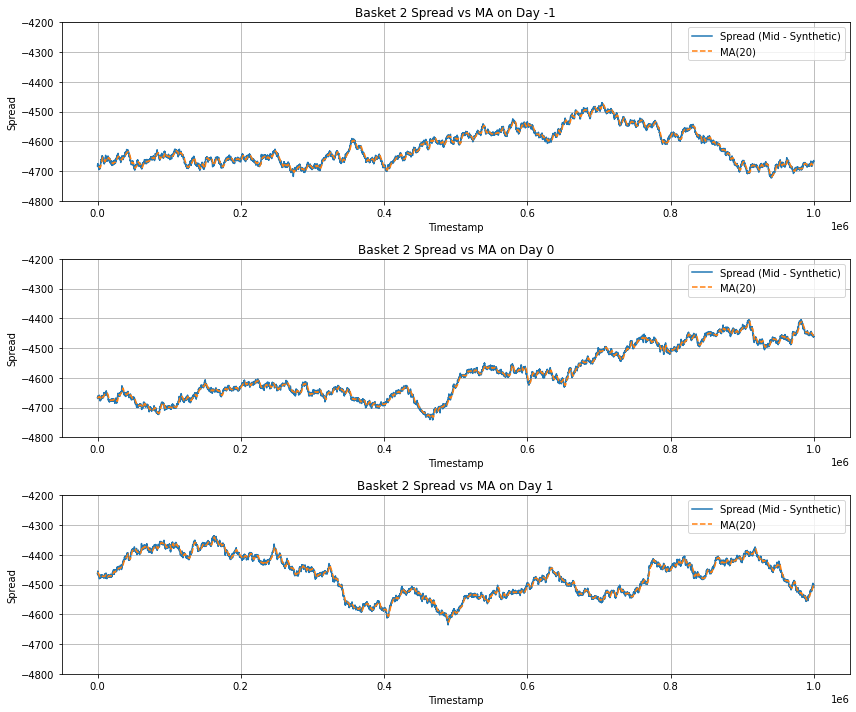

In [ ]:
# Filter for Basket 2 only
basket2_df = df[df["product"] == "PICNIC_BASKET2"].copy()

# Compute rolling mean (MA20) of spread_mid_syn
basket2_df["spread_ma"] = basket2_df["spread_mid_syn"].rolling(window=20).mean()

# Set up subplots for each day
unique_days = sorted(basket2_df["day"].unique())
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10), sharex=False)

for i, day in enumerate(unique_days):
    day_df = basket2_df[basket2_df["day"] == day]
    
    axes[i].plot(day_df["timestamp"], day_df["spread_mid_syn"], label="Spread (Mid - Synthetic)", color="tab:blue")
    axes[i].plot(day_df["timestamp"], day_df["spread_ma"], label="MA(20)", linestyle="--", color="tab:orange")
    
    axes[i].set_title(f"Basket 2 Spread vs MA on Day {day}")
    axes[i].set_ylabel("Spread")
    axes[i].set_xlabel("Timestamp")
    axes[i].set_ylim([-4800, -4200])  
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

#### Apply the ADF (Augmented Dickey-Fuller) test to check for stationarity in the spread between the mid-price and synthetic price of PICNIC_BASKET2.

In [49]:
from statsmodels.tsa.stattools import adfuller

# Function to apply ADF test and interpret result
def adf_test(series, title=""):
    print(f"\nADF Test on {title}")
    result = adfuller(series.dropna(), autolag='AIC')
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    for key, value in result[4].items():
        print(f"  Critical Value {key}: {value:.4f}")
    if result[1] < 0.05:
        print("The spread is likely stationary (reject H0).")
    else:
        print("The spread is likely non-stationary (fail to reject H0).")

# Run ADF test for each day
for day in sorted(basket2_df["day"].unique()):
    day_spread = basket2_df[basket2_df["day"] == day]["spread_mid_syn"]
    adf_test(day_spread, title=f"Basket 2 Spread - Day {day}")


ADF Test on Basket 2 Spread - Day -1
ADF Statistic: -1.9451
p-value: 0.3111
  Critical Value 1%: -3.4310
  Critical Value 5%: -2.8618
  Critical Value 10%: -2.5669
The spread is likely non-stationary (fail to reject H0).

ADF Test on Basket 2 Spread - Day 0
ADF Statistic: -1.0268
p-value: 0.7434
  Critical Value 1%: -3.4310
  Critical Value 5%: -2.8618
  Critical Value 10%: -2.5669
The spread is likely non-stationary (fail to reject H0).

ADF Test on Basket 2 Spread - Day 1
ADF Statistic: -1.6767
p-value: 0.4432
  Critical Value 1%: -3.4310
  Critical Value 5%: -2.8618
  Critical Value 10%: -2.5669
The spread is likely non-stationary (fail to reject H0).


**Takeaway:** Basket 2 shows a non-stationary spread so I am not sure if cointegration could work now. We can still try I guess? I don't know much about cointegration tbh so maybe someone else could look into that? 